# Lyft's BikeShare data for the year 2018

> The data consisted of 12 different files that were turned into one mega csv file. Each of the 12 files were months from the year 2018, which were then combined into one file for the whole year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg
%matplotlib inline

## Data Wrangling

## `Gather`  
There was a total of 12 different folders, in each folder there was a csv file with bike data from that folder's respective month. So 201801-fordgobike-tripdata.csv/201801 folder had a csv file called 201801-fordgobike-tripdata.csv. Each file in each folder was then concatenated into one large file called bikedata_2018.

In [ ]:
months = np.arange(1,13)
print(months)

In [ ]:
all_files = []
for m in months:
    if m < 10:
        m = './20180{}-fordgobike-tripdata.csv/20180{}-fordgobike-tripdata.csv'.format(m,m)
    else:
        m = './2018{}-fordgobike-tripdata.csv/2018{}-fordgobike-tripdata.csv'.format(m,m)
    all_files.append(m)

In [ ]:
bikedata_2018 = pd.concat(pd.read_csv(f) for f in all_files).reset_index(drop=True)

In [ ]:
bikedata_2018.to_csv('bikedata_2018.csv', index = False)

## `Assess`  
* Change the start_time & end_time column into datetime objects
* Change bike_id from int to float, the id's are whole numbers 
* Change the values for member_birth_year that are < 1919
* Fill in null values for columns 'station_id,'station_name', 'member_birth_year', 'member_gender'

* Create new column that shows duration in minutes
* Create an age column by subtracting 2018 from the members birth year
* Find the city & county of the start and end location
* Change user_type to subscribers and make it boolean, subscribers = True, customer = False
* Create a new column called duration, which will be categorical

In [2]:
pd.set_option('display.max_columns', 500)
bikedata_2018 = pd.read_csv('bikedata_2018.csv')

In [3]:
#5 random rows from bikdata_2018
bikedata_2018.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1566765,71285,2018-10-04 13:02:26.5780,2018-10-05 08:50:31.7070,133.0,Valencia St at 22nd St,37.755213,-122.420975,350.0,8th St at Brannan St,37.771431,-122.405787,2856,Customer,NaN,NaN,No
655481,356,2018-06-26 13:05:27.9190,2018-06-26 13:11:24.2750,159.0,24th St at Market St,37.816060,-122.278244,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,3725,Subscriber,1975.0,Male,Yes
1767432,530,2018-12-20 09:28:43.9460,2018-12-20 09:37:34.6130,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,50.0,2nd St at Townsend St,37.780526,-122.390288,2197,Subscriber,1951.0,Male,No
1541882,203,2018-10-09 12:53:33.9040,2018-10-09 12:56:56.9430,114.0,Rhode Island St at 17th St,37.764478,-122.402570,116.0,Mississippi St at 17th St,37.764802,-122.394771,191,Subscriber,1985.0,Male,No
884160,516,2018-07-22 07:55:09.9940,2018-07-22 08:03:46.1810,107.0,17th St at Dolores St,37.763015,-122.426497,350.0,8th St at Brannan St,37.771431,-122.405787,3944,Subscriber,1967.0,Male,No


In [4]:
#describe
bikedata_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [5]:
#info
bikedata_2018.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [6]:
#for loop gets cols that have more than 1 missing value
col_missing = []
for cols in bikedata_2018.columns:
    if bikedata_2018[cols].isnull().sum() > 1:
        col_missing.append(cols)

In [7]:
#list of cols that have missing values
col_missing

['start_station_id',
 'start_station_name',
 'end_station_id',
 'end_station_name',
 'member_birth_year',
 'member_gender']

In [8]:
#1160 members were born before 1919, which mean they are over 100 years old.
len(bikedata_2018.query("member_birth_year < 1919"))

1160

## `Clean`

In [9]:
#create a copy of the dataframe before cleaning
bikedata = bikedata_2018.copy()

**Change start_time & end_time to datetime objects**

In [10]:
#apply pandas.to_datetime to the start_time and end_time columns
bikedata[['start_time','end_time']] =\
bikedata[['start_time','end_time']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [11]:
#check
bikedata[['start_time','end_time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 2 columns):
start_time    datetime64[ns]
end_time      datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 28.4 MB


**Change bike_id from int to float**

In [12]:
#to float
bikedata['bike_id'] =\
bikedata['bike_id'].astype('float')

In [13]:
#check
bikedata['bike_id'].dtype

dtype('float64')

**Skip start_station_id, start_station_name, end_station_id, end_station_name**
*  These columns will not be necessary in the analysis

**Change the values where members are 90 years old or older to the median**  
*    Members probably put in fake birth years, I dont think a 90 year old person will be riding a bike

In [14]:
#Change the values for member_birth_year that are < 1929 to the median, which is 1985
year_median = bikedata.member_birth_year.median()
year_below_1929 = bikedata.query("member_birth_year < 1929")['member_birth_year']
for year in year_below_1929:
    bikedata.member_birth_year.replace(year, year_median, inplace = True)

In [15]:
#Check the minimum values now
"The oldest member to ride is {:.0f}, born in {:.0f}".format(2018-bikedata.member_birth_year.min(),bikedata.member_birth_year.min())

'The oldest member to ride is 88, born in 1930'

**Fill in missing values for the birth_years with the median**

In [16]:
print("There are {} Null Values in member_birth_year column.".format(bikedata.member_birth_year.isnull().sum()))

There are 110718 Null Values in member_birth_year column.


In [17]:
#year_median is set as the median of the member_birth_years, which is 1985
bikedata.member_birth_year.fillna(year_median, inplace = True)

**Fill in missing values for the member_gender column with "Other"**

In [18]:
print("There are {} Null Values in the member_gender column.".format(bikedata.member_gender.isnull().sum()))

There are 110367 Null Values in the member_gender column.


In [19]:
#fill missing gender with Other
bikedata.member_gender.fillna('Other',inplace = True)

In [20]:
#check
bikedata.member_gender.value_counts()

Male      1288085
Female     438188
Other      137448
Name: member_gender, dtype: int64

**Create a new column with minutes**   
* Convert seconds into minutes

In [21]:
#divide the duration sec column by 60 inorder to create a duration min column
bikedata['duration_min'] = bikedata.duration_sec/60

In [22]:
#check 
'duration_min' in bikedata.columns

True

**Create an age column by subtracting 2018 from the member birth year**

In [23]:
#create a new column age which will be 2018 subtracted by member_birth_year 
bikedata['age'] = 2018 - bikedata['member_birth_year']

In [24]:
#check to see if the column was made
'age' in bikedata.columns

True

**Find the city of the start and end locations using the longitude and latitude**
* Use reverse_geocoder library
* Create two dataframes for the start and end location
* Concatenate the two dataframes into one start_end_location
* Merge the concatenated dataframe into the original, bikedata
* Drop redundant columns

In [25]:
#create a tuple of start lat and long so that we can use the reverse_geocoder library
bikedata['start_loc'] = list(zip(bikedata.start_station_latitude, bikedata.start_station_longitude))

In [26]:
#start location into a list format so that we can use the reverse_geocoder
start = list(bikedata['start_loc'].values)

In [27]:
#list of dictionaries for the start locations
dictionary_start_loc = rg.search(start,mode = 2)

Loading formatted geocoded file...


In [28]:
#create start location dataframe
start_df = pd.DataFrame(dictionary_start_loc)

In [29]:
#rename columns to bettter match variables
start_df.rename({'lat':'start_lat','lon':'start_lon','name':'start_city_name','admin1':'start_state','admin2':'start_county'},axis =1, inplace = True)

In [30]:
#drop cc as we already know the country
start_df.drop('cc',inplace = True,axis = 1)

In [31]:
#check
start_df.head()

,start_lat,start_lon,start_city_name,start_state,start_county
0,37.77493,-122.41942,San Francisco,California,San Francisco County
1,37.77493,-122.41942,San Francisco,California,San Francisco County
2,37.33939,-121.89496,San Jose,California,Santa Clara County
3,37.77493,-122.41942,San Francisco,California,San Francisco County
4,37.77493,-122.41942,San Francisco,California,San Francisco County


In [32]:
#create a tuple of end lat and long so that we can use the reverse_geocoder library
bikedata['end_loc'] = list(zip(bikedata.end_station_latitude, bikedata.end_station_longitude))

In [33]:
#end location into a list format so that we can use the reverse_geocoder
end = list(bikedata['end_loc'].values)

In [34]:
#list of dictionary for the end locations
dictionary_end_loc = rg.search(end, mode = 2)

In [35]:
#create end df with end location values
end_df = pd.DataFrame(dictionary_end_loc)

In [36]:
#check
end_df.head()

,lat,lon,name,admin1,admin2,cc
0,37.77493,-122.41942,San Francisco,California,San Francisco County,US
1,37.77493,-122.41942,San Francisco,California,San Francisco County,US
2,37.33939,-121.89496,San Jose,California,Santa Clara County,US
3,37.77493,-122.41942,San Francisco,California,San Francisco County,US
4,37.77493,-122.41942,San Francisco,California,San Francisco County,US


In [37]:
#rename columns for better understanding of variables
end_df.rename({'lat':'end_lat','lon':'end_lon','name':'end_city_name','admin1':'end_state','admin2':'end_county'},axis =1, inplace = True)

In [38]:
#drop cc as we already know the country
end_df.drop('cc',axis = 1, inplace = True)

In [39]:
#concat start and end dataframe into one
start_end_location = pd.concat([start_df, end_df], axis=1)

In [40]:
#check
start_end_location.head()

,start_lat,start_lon,start_city_name,start_state,start_county,end_lat,end_lon,end_city_name,end_state,end_county
0,37.77493,-122.41942,San Francisco,California,San Francisco County,37.77493,-122.41942,San Francisco,California,San Francisco County
1,37.77493,-122.41942,San Francisco,California,San Francisco County,37.77493,-122.41942,San Francisco,California,San Francisco County
2,37.33939,-121.89496,San Jose,California,Santa Clara County,37.33939,-121.89496,San Jose,California,Santa Clara County
3,37.77493,-122.41942,San Francisco,California,San Francisco County,37.77493,-122.41942,San Francisco,California,San Francisco County
4,37.77493,-122.41942,San Francisco,California,San Francisco County,37.77493,-122.41942,San Francisco,California,San Francisco County


In [41]:
#create copy to avoid problems
bikedata = bikedata.join(start_end_location).copy()

In [42]:
#drop start_lat,start_lon,end_lat,end_Lon as the original dataframe already has these values
#also drop start_loc, end_loc as this is unnecessary
bikedata.drop(['start_lat','start_lon','end_lat','end_lon','start_loc','end_loc'],axis = 1,inplace = True)

In [43]:
#check
bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_city_name,start_state,start_county,end_city_name,end_state,end_county
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765.0,Subscriber,1986.0,Male,No,1254.733333,32.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815.0,Customer,1985.0,Other,No,1423.700000,33.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039.0,Customer,1996.0,Male,No,1192.933333,22.0,San Jose,California,Santa Clara County,San Jose,California,Santa Clara County
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321.0,Customer,1985.0,Other,No,1017.933333,33.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617.0,Subscriber,1991.0,Male,No,666.100000,27.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County


In [44]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 24 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    float64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
duration_min               float64
age                        float64
start_city_name            object
start_state                object
start_county               object
end_city_name              object
end_state                  object
end_county                 object
dtypes: datetime64[ns](2), float64(10), int64(

**Change user_type column in to subscribers**
* Subscriber = True
* Customer = False

In [45]:
#rename column
bikedata.rename({'user_type':'subscriber'},axis = 1, inplace = True)

In [46]:
#rename variables
bikedata.subscriber.replace({'Subscriber':True, 'Customer':False}, inplace = True)

In [47]:
#check
bikedata.subscriber.value_counts()

True     1583554
False     280167
Name: subscriber, dtype: int64

**Create a new column called duration**
* The values for the duration in minutes and seconds are very spread out
* Change the values to just three categories: Short. Medium. Long
* Short: 0-14 minutes
* Medium: 14-30 minutes 
* Long: 30 minutes + (30 minutes is considered long because after 30 minutes members are charged more)

In [48]:
bins = [0,14,30,np.inf]
labels = ['short','medium','long']
bikedata['duration'] = pd.cut(bikedata['duration_min'], bins =bins, labels = labels)

In [49]:
#check
bikedata['duration'].value_counts()

short     1365133
medium     403401
long        95187
Name: duration, dtype: int64

## How can we increase revenue?
> Increase the number of subscribers  
Increase ride duration
### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest will be the duration column
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The gender, age, subscriber, time and county will be helpful inorder to get to know more about the duration

## Univariate Exploration

In [50]:
bikedata.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,subscriber,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,age,start_city_name,start_state,start_county,end_city_name,end_state,end_county,duration
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765.0,True,1986.0,Male,No,1254.733333,32.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County,long
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815.0,False,1985.0,Other,No,1423.700000,33.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County,long
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039.0,False,1996.0,Male,No,1192.933333,22.0,San Jose,California,Santa Clara County,San Jose,California,Santa Clara County,long
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321.0,False,1985.0,Other,No,1017.933333,33.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County,long
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617.0,True,1991.0,Male,No,666.100000,27.0,San Francisco,California,San Francisco County,San Francisco,California,San Francisco County,long


In [51]:
bikedata.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,age
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983261e+03,1.428838e+01,3.473884e+01
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,9.911578e+00,3.950631e+01,9.911578e+00
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.930000e+03,1.016667e+00,1.800000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.979000e+03,5.833333e+00,2.800000e+01
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03,9.266667e+00,3.300000e+01
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.990000e+03,1.453333e+01,3.900000e+01
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03,1.439433e+03,8.800000e+01


Text(0.5, 0, 'duration in minutes')

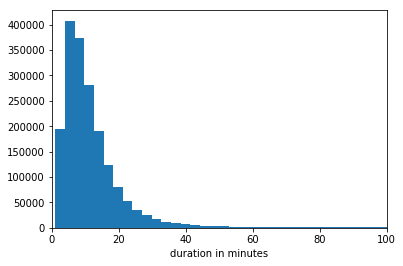

In [52]:
#plot the duration of bikeshare use in minutes
plt.hist(data =bikedata, x= 'duration_min', bins = 500)
plt.xlim(0,100)
plt.xlabel('duration in minutes')

Duration_min follows a right skew pattern, most of the rides were between 0-20 minutes long. We know that the company only charges extra for minutes after 30 minutes, but why are most riders riding for less than 30 minutes? (explore this later) Lets look at the age of our riders next.

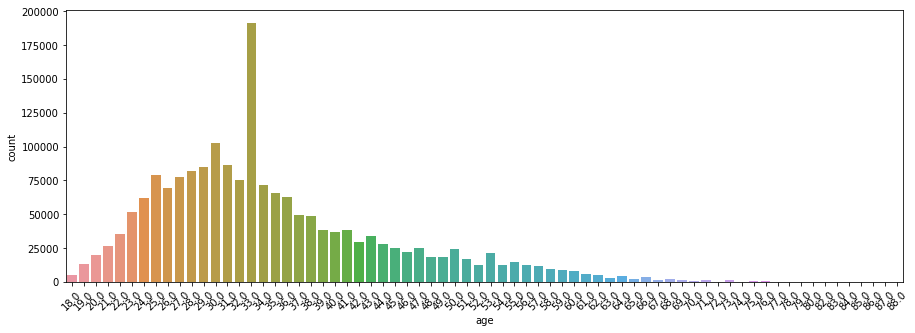

In [53]:
#plot the frequency the different ages that used bikeshare
plt.figure(figsize = (15,5))
sns.countplot(x='age',data = bikedata)
plt.xticks(rotation = 45);

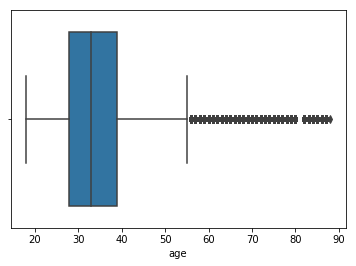

In [54]:
sns.boxplot(bikedata.age)

From the bar chart of all the ages that used bike share. Those that were 33 years old rode the most. From the boxplot we can see that most of our users are between 25-40 years old. Why are there so many more 33 year olds then the other ages? Maybe the default year during subscription is set to 1985? Lets look at the gender of those who are using bikeshare next.

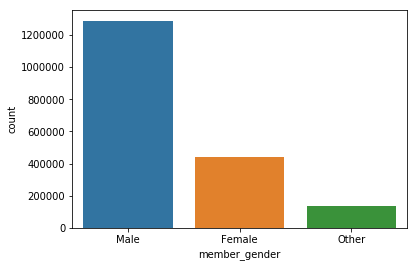

In [55]:
#plot the frequency of the genders that used bikeshare
sns.countplot(x='member_gender',data = bikedata, order = ['Male','Female','Other'])

Wow we can see that Males used bike share the most. Males used bikeshare 2x more than females. Why are there more male riders than females riders? Lets look at the frequency of the month of use using the start_time.

Text(0.5, 0, 'months')

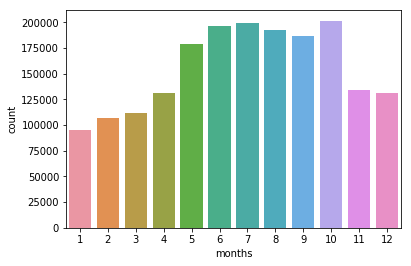

In [56]:
sns.countplot(x = bikedata.start_time.dt.month, data= bikedata)
plt.xlabel('months')

We can see that the use of bikeshare is goes up from january to october and drops down on november. Does this mean users prefer to ride the bikes during hotter months? Lets check how many of our riders are subscribers next.

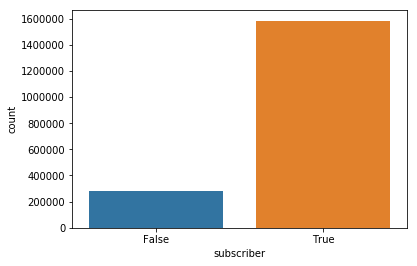

In [57]:
#plot of the number of subscribers
sns.countplot(x= 'subscriber',data= bikedata)

Most of the users that used bikeshare were subscribers. Wow there are a lot of subscribers. Does the subscribers impact the duration in bike use? Lets check out the duration of bike use next.

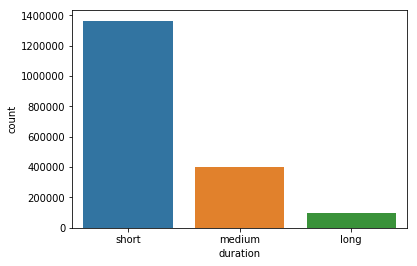

In [58]:
sns.countplot(x='duration', data=bikedata)

Most rides were short meaning that they were under 14 minutes long. Does this mean that most of the subscribers rode for a shorter period?

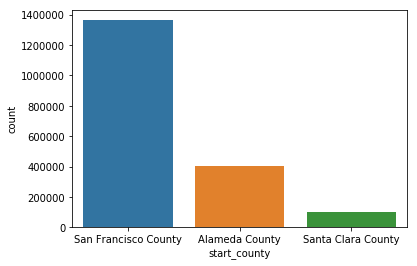

In [83]:
sns.countplot(x= 'start_county',data= bikedata, order =['San Francisco County','Alameda County', 'Santa Clara County'])

## Bivariate Exploration

`Subscriber vs Duration`

In [59]:
#plot duration of ride and whether or not the rider is a subscriber
d = pd.pivot_table(data=bikedata, values='duration_min', index='subscriber').reset_index()
d

,subscriber,duration_min
0,False,32.046325
1,True,11.146588


Text(0.5, 1.0, 'Duration of ride of users')

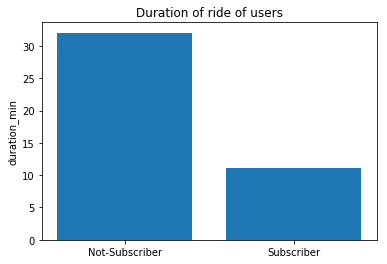

In [60]:
#plotting duration of ride in y and user type in x
plt.bar(x='subscriber', height = 'duration_min', data = d, tick_label = ['Not-Subscriber','Subscriber'])
plt.ylabel('duration_min')
plt.title('Duration of ride of users')

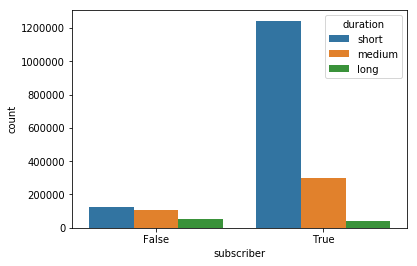

In [61]:
sns.countplot(x= 'subscriber', hue='duration', data = bikedata)

The first plot shows that non subscribers rode the bikes for a longer time than the subscribers. The second plot shows that non-subscribers were less varied in the duration of their trips than subscribers. Subscribers mostly rode the bikes for a shorter period.

In [62]:
#get the rows where start_county == end_county
start_end = bikedata[bikedata.start_county == bikedata.end_county].copy()
#filter so that we only have the three county's that we want
three_county = start_end.query("start_county == 'San Francisco County' |start_county == 'Alameda County' | start_county =='Santa Clara County'")

`County vs Duration`

<BarContainer object of 3 artists>

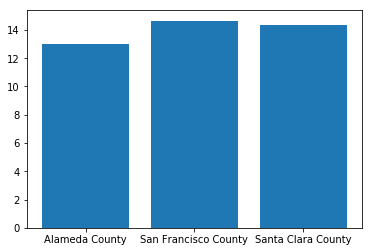

In [63]:
#average duration and county
plt.bar(x = three_county.groupby('start_county')['duration_min'].mean().index, height = three_county.groupby('start_county')['duration_min'].mean())

(0, 60)

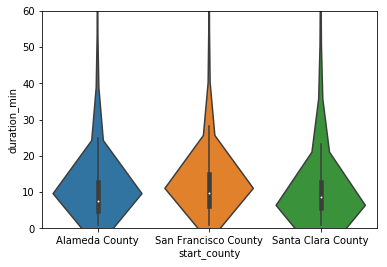

In [64]:
#duration and county
sns.violinplot(data =three_county, x = 'start_county', y='duration_min', order = ['Alameda County','San Francisco County', 'Santa Clara County'])
plt.ylim(0,60)

From the data we can see that the duration of rides were similar throughout the three counties. However Alameda County had the lowest average duration of rides at around 12.5 minutes. We can also see that throughout the three County's most people rode the bikes for around 10 minutes.

`Duration vs Age`

Text(0, 0.5, 'Duration (min)')

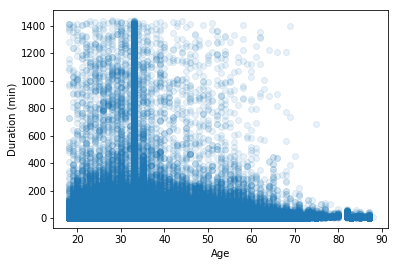

In [84]:
#scatter plot of age in x and duration in minutes in y
plt.scatter(x= 'age', y='duration_min', data = bikedata, alpha = .1)
plt.xlabel('Age')
plt.ylabel('Duration (min)')

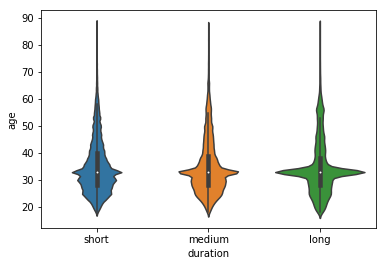

In [66]:
sns.violinplot(x='duration', y='age',data= bikedata)

Overall the data seems to show that younger people rode on the bikes for longer periods of time. However, there is a weird pattern at the age 33 mark. But this was not a surprise as we already graphed the frequency of the member's ages. The members who rode the bikes for a long period of time happened to be mostly in their early 30's

`Gender vs Duration`

(0, 50)

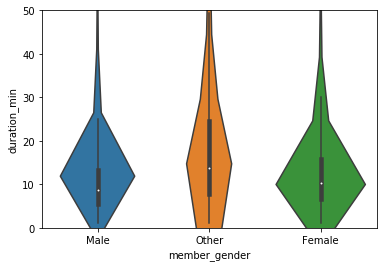

In [67]:
sns.violinplot(x='member_gender', y ='duration_min', data= bikedata)
plt.ylim(0,50)

Both males and females seemed to ride a similar amount, mostly around 12 minutes. Those that did not disclose their gender varied more in duration than those who did.

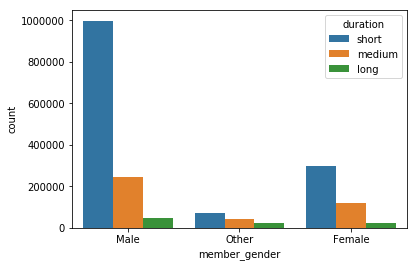

In [68]:
sns.countplot(x= 'member_gender',hue= 'duration', data=bikedata)

We can see that throughout the gender's, most members ride the bikes for 14 minutes or less. However, it is also noted that more percentage of male members ride for a shorter amount of time than females.

In [69]:
bikedata.query("age < 60").groupby('subscriber')['age'].mean()

subscriber
False    32.624738
True     34.276225
Name: age, dtype: float64

`Age vs Gender/Subscriber`

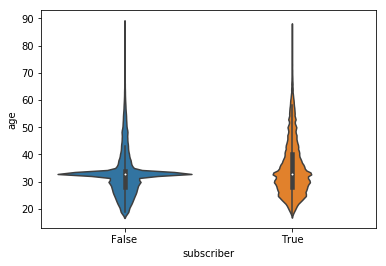

In [70]:
#violinplot of subscribers and their age
sns.violinplot(x= 'subscriber', y= 'age', data= bikedata)

Those that were not subscribers were mostly around 33 years old. Subscribers age were more diverse than non subscribers.

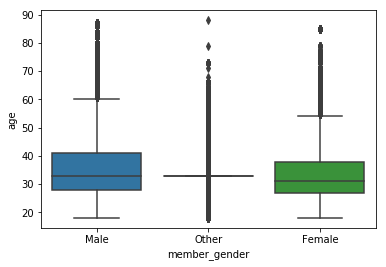

In [71]:
#violinplot of the genders and their age
sns.boxplot(x='member_gender', y= 'age', data=bikedata)

Text(0.5, 0, 'months')

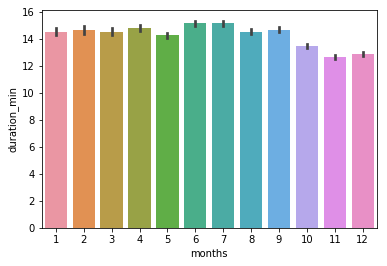

In [72]:
sns.barplot(x = bikedata.start_time.dt.month, y= 'duration_min', data= bikedata)
plt.xlabel('months')

People tend to ride for a longer time during the month of june and july. And lesser during october, november, and december.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>* Non subscribers rode the bikes for a longer period of time
* There is an unsually large amount of users that are born in 1985
* Many more males rode for a shorter duration than female riders
* People ride for a longer period during the month of june and july.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * An interesting observation was that most of the non subscribers were 33 years old. This maybe because the default year when signing up is set at 1985.  
* Another interesting observation was that the age of the unknown genders were highly variable.

## Multivariate Exploration

Text(0, 0.5, 'Duration of Trip (min)')

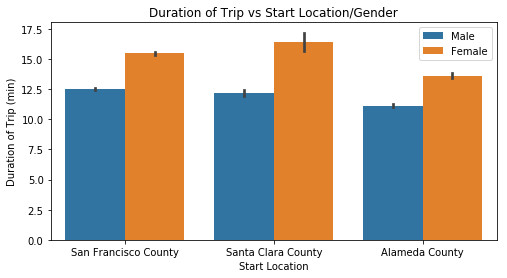

In [74]:
#only use dataframe with three county's of interest
plt.figure(figsize = (8,4))
sns.barplot(data= three_county, x= 'start_county',y ='duration_min', hue='member_gender',hue_order=['Male','Female'])
plt.title('Duration of Trip vs Start Location/Gender')
plt.legend(title=None)
plt.xlabel('Start Location')
plt.ylabel('Duration of Trip (min)')

In [75]:
#create a new column called months for ease of use
bikedata['start_month'] = bikedata.start_time.dt.month_name()

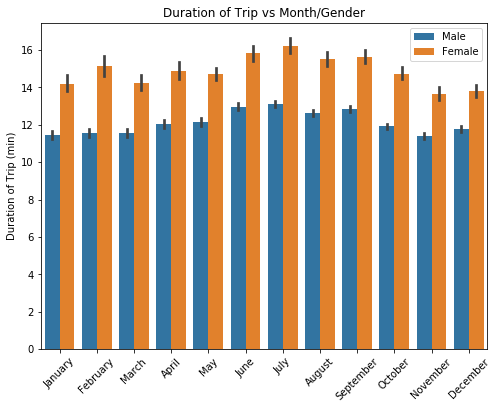

In [76]:
#multivariate bar plot to showdurationvs month/gender
plt.figure(figsize= (8,6))
sns.barplot(data=bikedata, x= 'start_month', y= 'duration_min', hue = 'member_gender', hue_order = ['Male','Female'])
plt.title('Duration of Trip vs Month/Gender')
plt.legend(title = None)
plt.xlabel('')
plt.ylabel('Duration of Trip (min)')
plt.xticks(rotation = 45);

Throughout the year, females ride for a longer period of time than males.

Text(0.5, 0, '')

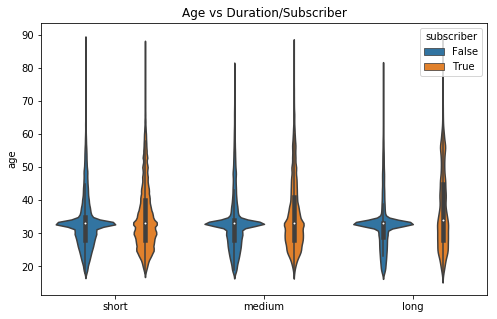

In [77]:
#violinplot showing the distribution of age and the duration/subscribers
plt.figure(figsize= (8,5))
sns.violinplot(data=bikedata, x='duration', y='age',hue='subscriber')
plt.title('Age vs Duration/Subscriber')
plt.xlabel('')

In [78]:
#divide age into two groups < 55 is young >= 55 is old
bikedata['age_cat'] = pd.cut(x=bikedata['age'], bins= [0,55,np.inf],labels = ['young','old'])

Text(0, 0.5, 'Duration of Ride (min)')

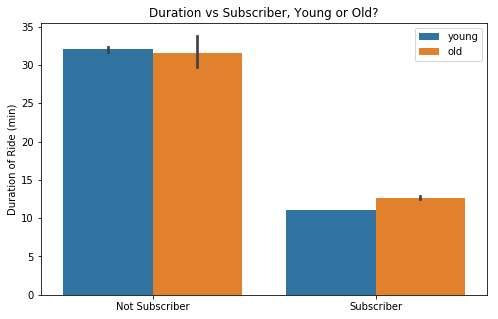

In [87]:
#bargraph of duration of ride on the age_category/ subscriber
plt.figure(figsize=(8,5))
sns.barplot(x='subscriber', y='duration_min',hue='age_cat',data=bikedata)
plt.title('Duration vs Subscriber, Young or Old?')
plt.xticks(ticks = [0,1],labels= ('Not Subscriber','Subscriber'))
plt.legend(title= None)
plt.xlabel('')
plt.ylabel('Duration of Ride (min)')

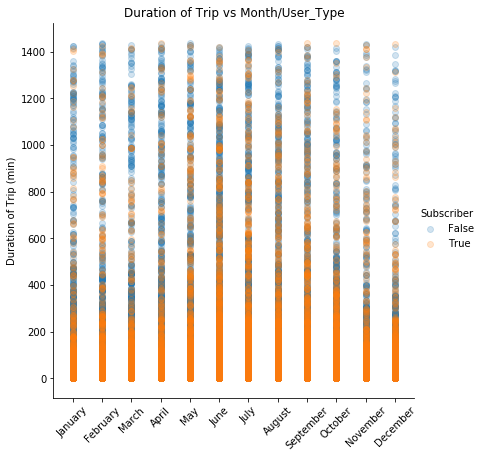

In [80]:
#duration of trip in minutes vs themonths/subscribers
g = sns.FacetGrid(data =bikedata, hue = 'subscriber',height = 6)
g.map(plt.scatter,'start_month','duration_min',alpha = .2)
g.add_legend(title=('Subscriber'))
plt.title('Duration of Trip vs Month/User_Type')
plt.ylabel('Duration of Trip (min)')
plt.xlabel('')
plt.xticks(rotation = 45);

### Were there any interesting or surprising interactions between features?

> * The average length of trips for females were longer than that of males
* Those that were not subscribers were mostly in their early 30's
* When looking at the subscribers, as duration (category) increased, the distribution in age increased as well. 
* There was a larger spread of ages riding for longer periods (> 30 minutes) than shorter periods ( < 15 minutes).
* No real difference in duration ridden for older and younger folks, subscriber or not. (Older >= 55)
* Many more subscribers rode for a duration of around 200 minutes and under than non-subscribers.
* There were many non-subscribers that rode more than 200 minutes, it looks like more non-subscribers rode for longer periods of time than subscribers.

In [81]:
#bikedata.to_csv('for_exploring.csv')